In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## 1.Read and Display

In [103]:
data = pd.read_csv("../Data/data.txt", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


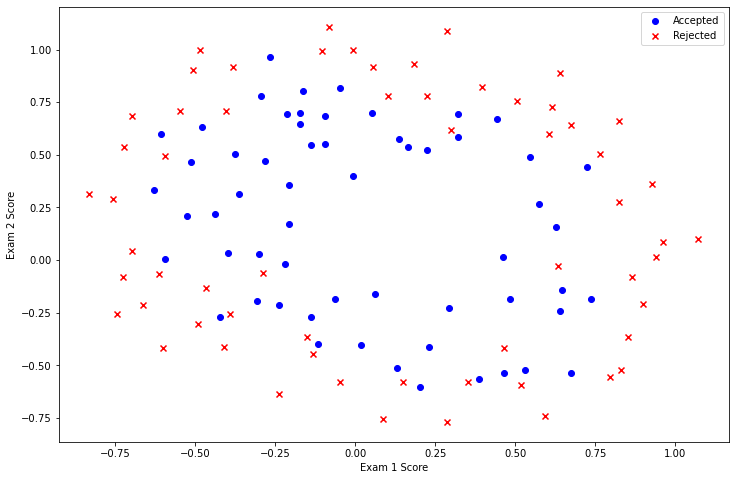

In [104]:
positive2 = data[data['Admitted']==1]
negative2 = data[data['Admitted']==0]
plt.figure(figsize=(12,8))
plt.scatter(positive2['Exam 1'], positive2['Exam 2'],c='b', marker='o', label='Accepted')
plt.scatter(negative2['Exam 1'], negative2['Exam 2'], c='r', marker='x', label='Rejected')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

The above image shows that this dataset cannot be split between two parts using a straight line as before. Logistic regression is only suitable for linear segmentation, so this dataset is not suitable for direct use of logistic regression.  
A better way to use datasets is to create more features for each set of data. So we added features up to the power of 6 for each set of data.  

In [105]:
exam1=data['Exam 1']
exam2=data['Exam 2']
data['ones']=1
for i in range(1,7):
    for j in range(0,i+1):
        data['F'+str(i-j)+str(j)]=np.power(exam1,i-j)*np.power(exam2,j)
data.drop(['Exam 1','Exam 2'],axis=1,inplace=True)
data.head()

,Admitted,ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [106]:
X=np.array(data.iloc[:,1:data.shape[1]].values)
Y=np.array(data.iloc[:,0:1].values)
Theta=np.zeros(X.shape[1])
learning_rate=1
print(X.shape,Y.shape,Theta.shape)
#print(X,Y,Theta)

(118, 28) (118, 1) (28,)


## 2.Sigmoid implementation
$g(z)=\frac{1}{1+e^{-z}}$  

In [107]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

## 3.Cost Function implementation
$J(\Theta) = -\frac{1}{m} \sum\limits_{i=1}\limits^{m} [y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum\limits_{j=1}\limits^{n}\theta_j^2$  
$J(\Theta) = -\frac{1}{m} [Y^Tlog(g(X\Theta))+(1-Y)^Tlog(1-g(X\Theta))]+\frac{\lambda}{2m}\sum\limits_{j=1}\limits^{n}\theta_j^2$  

In [108]:
def CostFunction(Theta,X,Y,learning_rate):
    Theta=np.mat(Theta).T
    X=np.mat(X)
    Y=np.mat(Y)
    return (-(Y.T*np.log(Sigmoid(X*Theta))+(1-Y).T*np.log(1-Sigmoid(X*Theta)))/len(X))[0,0]+(learning_rate/(2*len(X)))*np.sum(np.power(Theta[1:Theta.shape[0],0],2))

In [109]:
print(CostFunction(Theta,X,Y,learning_rate))

0.6931471805599453


## 4.Gradient Descent
Here we calculate the value of θ with the tool library.  
we need to tell the function of tool library: Cost Function,$\frac{\partial}{\partial{θ_j}}J(θ)$,arguments.  
We don't need to define the number of iterations and learning rate, the function will directly tell us the optimal solution.  
$\frac{\partial}{\partial{θ_j}}J(θ)=\begin{cases}\frac{1}{m}\sum\limits_{i=1}\limits^{m}[h_\theta(x^{(i)})-y^{(i)}] \cdot x_j^{(i)}~ ~ ~ &,j=0\\\ \frac{1}{m}\sum\limits_{i=1}\limits^{m}[h_\theta(x^{(i)})-y^{(i)}] \cdot x_j^{(i)}+\frac{\lambda}{m}\theta_j~ ~ ~ &,j\neq0\end{cases}$   

In [110]:
def GetPartial(Theta,X,Y,learning_rate):
    Theta=np.mat(Theta).T;X=np.mat(X);Y=np.mat(Y)
    partial=np.zeros(X.shape[1])
    error=Sigmoid(X*Theta)-Y
    for i in range(X.shape[1]):
        term=np.multiply(error,X[:,i])
        if(i==0):
            partial[i]=np.sum(term)/len(X)
        else:
            partial[i]=(np.sum(term)+learning_rate*Theta[i,0])/len(X)
    return partial

In [111]:
result = opt.fmin_tnc(func=CostFunction, x0=Theta, fprime=GetPartial, args=(X,Y,learning_rate))
"""
func：function_name(return value)
x0：array
fprime:function_name(return array)
args:tuple(array)
"""
print(result)

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
       -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
       -1.4581701 , -0.05098418, -0.61558551, -0.27469165, -1.19271298,
       -0.2421784 , -0.20603295, -0.04466178, -0.27778953, -0.29539513,
       -0.45645982, -1.04319155,  0.02779373, -0.29244874,  0.01555761,
       -0.32742407, -0.14389151, -0.92467487]), 32, 1)


## 6.Evaluate

In [112]:
def predict(Theta, X):
    Theta=np.mat(Theta).T;X=np.mat(X);P=Sigmoid(X*Theta)
    return [1 if p >= 0.5 else 0 for p in P]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = sum(correct)/len(correct)
print (accuracy)

0.8305084745762712


## Attachment 1:Decision Boundary

In [113]:
def Compute_Z(Theta,x,y):
    Res= Theta[0]
    index= 1
    for i in range(1, 7):
        for j in range(0, i+1):
            Res+= np.power(x, i-j) * np.power(y, j) * Theta[index];index+=1
    return Res

In [114]:
def find_decision_boundary(Theta):
    x = np.linspace(-1, 1.5, 1000);y = np.linspace(-1, 1.5, 1000)
    x,y=np.meshgrid(x,y)
    x=x.flatten('F');y=y.flatten('F')
    val = pd.DataFrame({'x':x, 'y':y})
    val['Res'] = Compute_Z(Theta, val['x'], val['y'])
    decision = val[np.abs(val['Res'])<2 * 10**-3]
    return decision.x, decision.y

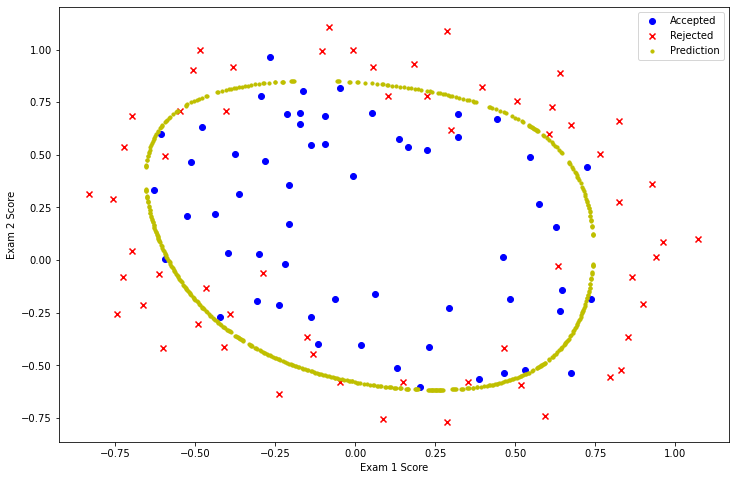

In [115]:
positive2 = data[data['Admitted']==1];negative2 = data[data['Admitted']==0]
plt.figure(figsize=(12,8))
plt.scatter(positive2['F10'], positive2['F01'],c='b', marker='o', label='Accepted')
plt.scatter(negative2['F10'], negative2['F01'], c='r', marker='x', label='Rejected')

x, y = find_decision_boundary(result[0])
plt.scatter(x, y, c='y', s=10, label='Prediction')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

## Attachment 2:Overfit

In [116]:
learning_rate = 0
result2 = opt.fmin_tnc(func=CostFunction, x0=Theta, fprime=GetPartial, args=(X,Y,learning_rate))
print(result2)

(array([ 1.22751664e+01,  1.56101161e+01,  7.48307264e+00, -1.31280763e+02,
       -6.70555567e+01, -4.01877416e+01, -1.28286673e+02, -1.19604377e+02,
       -3.95407810e+01,  1.03205227e+01,  4.75739518e+02,  4.35191845e+02,
        4.91202951e+02,  1.93924282e+02,  3.04494256e+01,  2.34237141e+02,
        3.67320671e+02,  3.81546469e+02,  1.89777486e+02,  1.01881669e+01,
       -2.77517053e+01, -5.58763117e+02, -7.60298662e+02, -1.03771075e+03,
       -7.47145919e+02, -5.87183017e+02, -1.83696282e+02, -1.03453752e-01]), 280, 3)


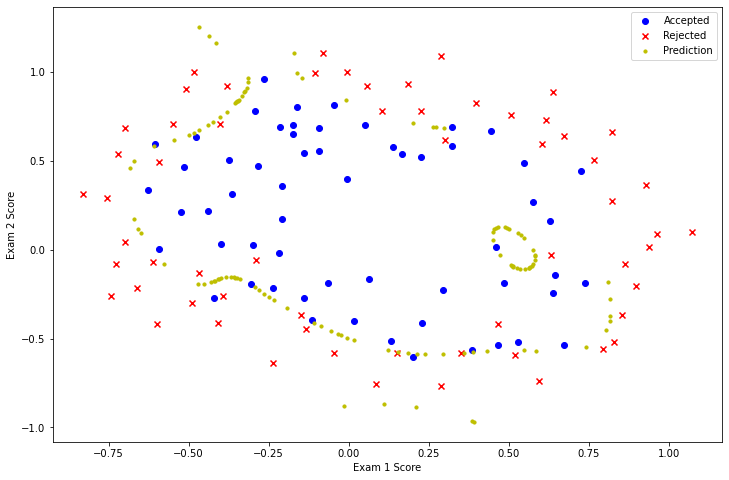

In [117]:
positive2 = data[data['Admitted']==1];negative2 = data[data['Admitted']==0]
plt.figure(figsize=(12,8))
plt.scatter(positive2['F10'], positive2['F01'],c='b', marker='o', label='Accepted')
plt.scatter(negative2['F10'], negative2['F01'], c='r', marker='x', label='Rejected')

x, y = find_decision_boundary(result2[0])
plt.scatter(x, y, c='y', s=10, label='Prediction')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

## Attachment 3:Underfit

In [118]:
learning_rate = 100
result3 = opt.fmin_tnc(func=CostFunction, x0=Theta, fprime=GetPartial, args=(X,Y,learning_rate))
print(result3)

(array([ 0.02187847, -0.0174817 ,  0.00571065, -0.05516901, -0.01314874,
       -0.03859873, -0.01846356, -0.00773219, -0.00892429, -0.02280461,
       -0.04343846, -0.00235623, -0.01415612, -0.00349507, -0.04143595,
       -0.02100593, -0.00471917, -0.00359131, -0.00632226, -0.0050244 ,
       -0.03197683, -0.03416334, -0.00107629, -0.00702615, -0.00038507,
       -0.0079823 , -0.00154779, -0.04108683]), 11, 1)


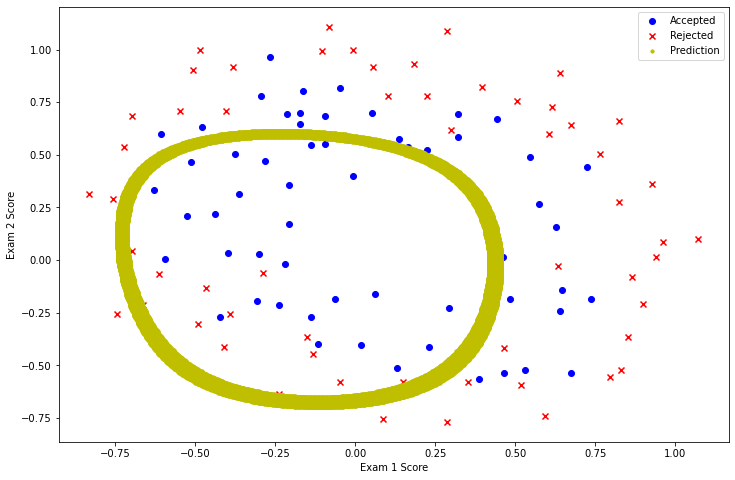

In [119]:
positive2 = data[data['Admitted']==1];negative2 = data[data['Admitted']==0]
plt.figure(figsize=(12,8))
plt.scatter(positive2['F10'], positive2['F01'],c='b', marker='o', label='Accepted')
plt.scatter(negative2['F10'], negative2['F01'], c='r', marker='x', label='Rejected')

x, y = find_decision_boundary(result3[0])
plt.scatter(x, y, c='y', s=10, label='Prediction')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()